In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,$368,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


In [5]:
df.shape

(102599, 24)

In [6]:
df.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [7]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


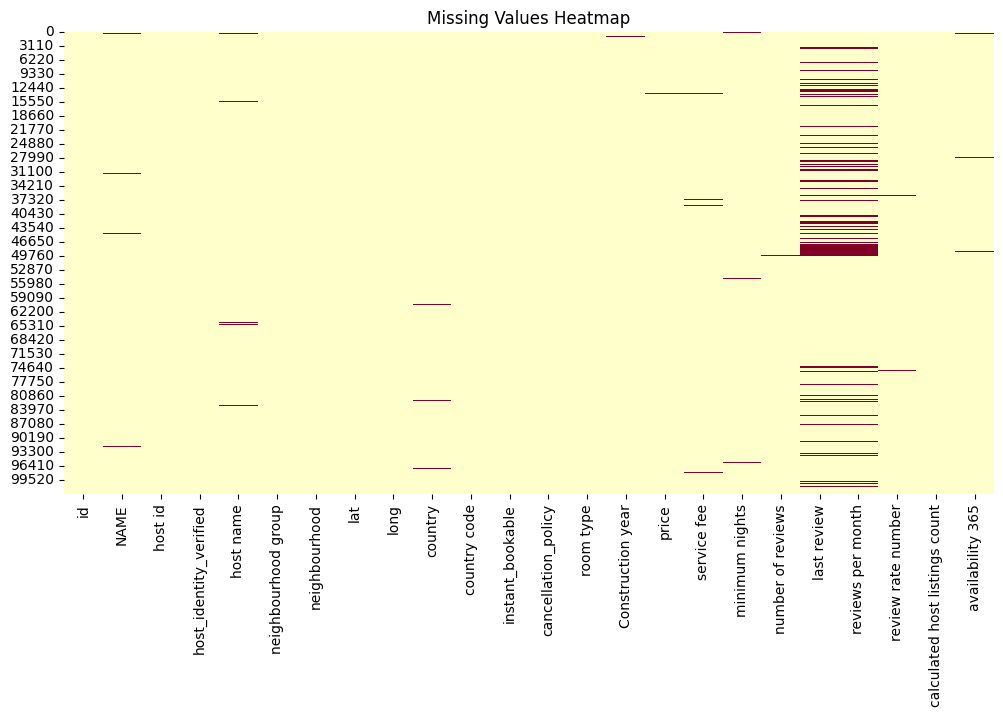

In [8]:
# Missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title('Missing Values Heatmap')
plt.show()

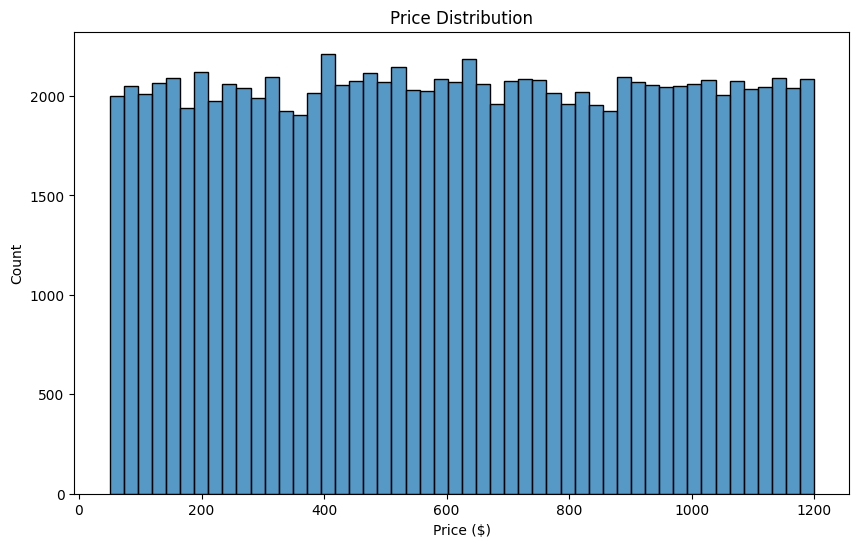

In [9]:
# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].str.replace('$', '').str.replace(',', '').astype(float).dropna(), bins=50)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.show()

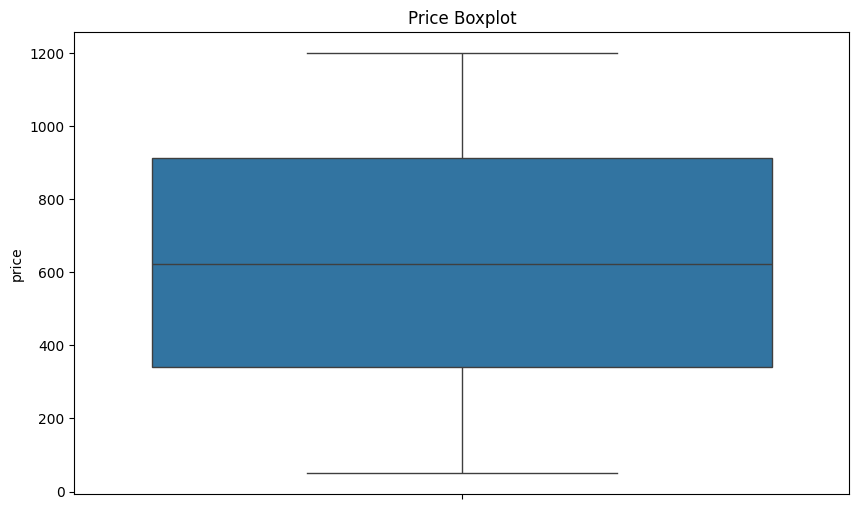

In [10]:
# Boxplot for price
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'].str.replace('$', '').str.replace(',', '').astype(float).dropna())
plt.title('Price Boxplot')
plt.show()

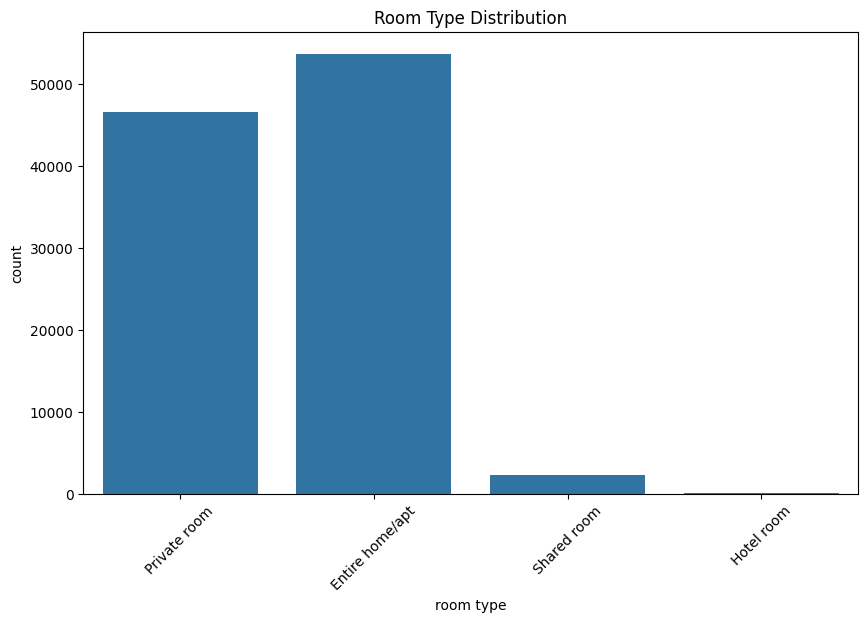

In [11]:
# Categorical counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room type')
plt.title('Room Type Distribution')
plt.xticks(rotation=45)
plt.show()


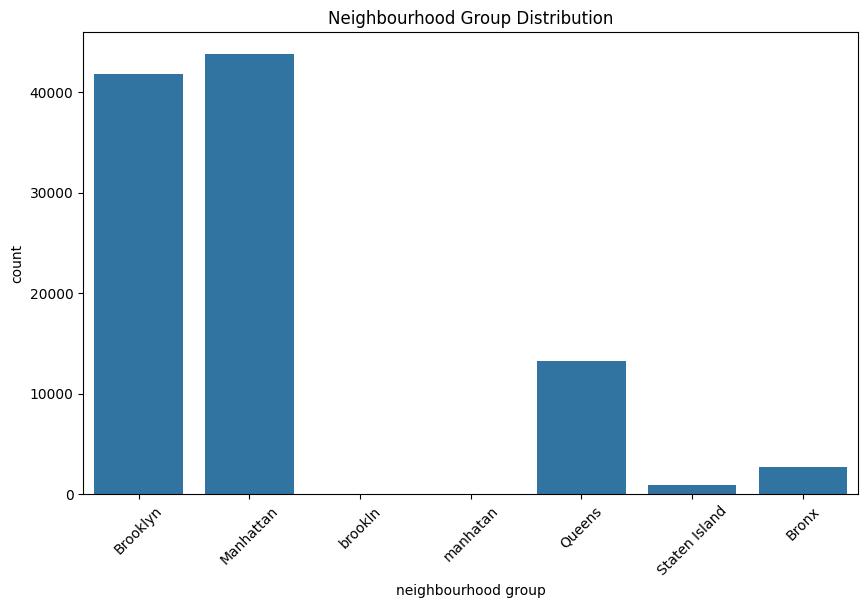

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood group')
plt.title('Neighbourhood Group Distribution')
plt.xticks(rotation=45)
plt.show()

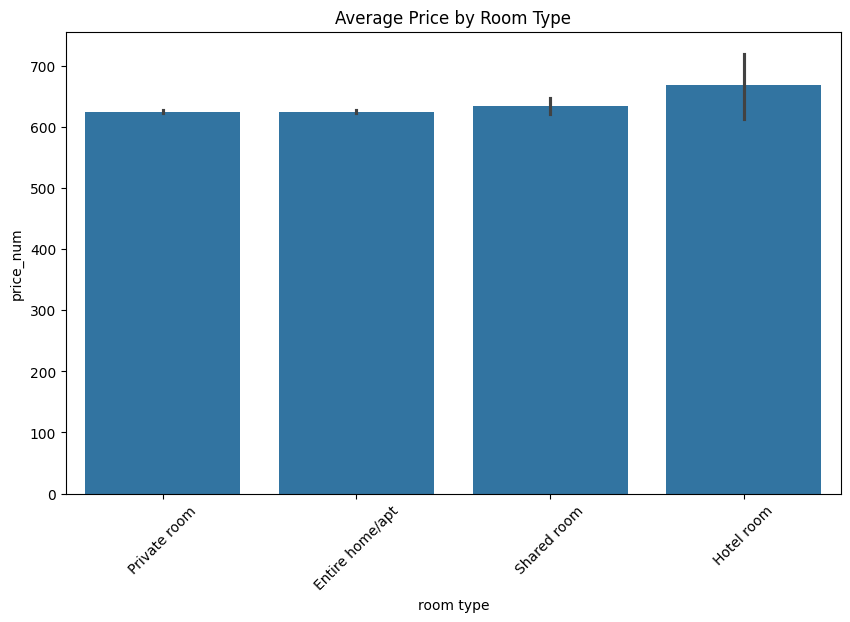

In [13]:
# Average price by room type
plt.figure(figsize=(10, 6))
df['price_num'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
sns.barplot(data=df, x='room type', y='price_num')
plt.title('Average Price by Room Type')
plt.xticks(rotation=45)
plt.show()

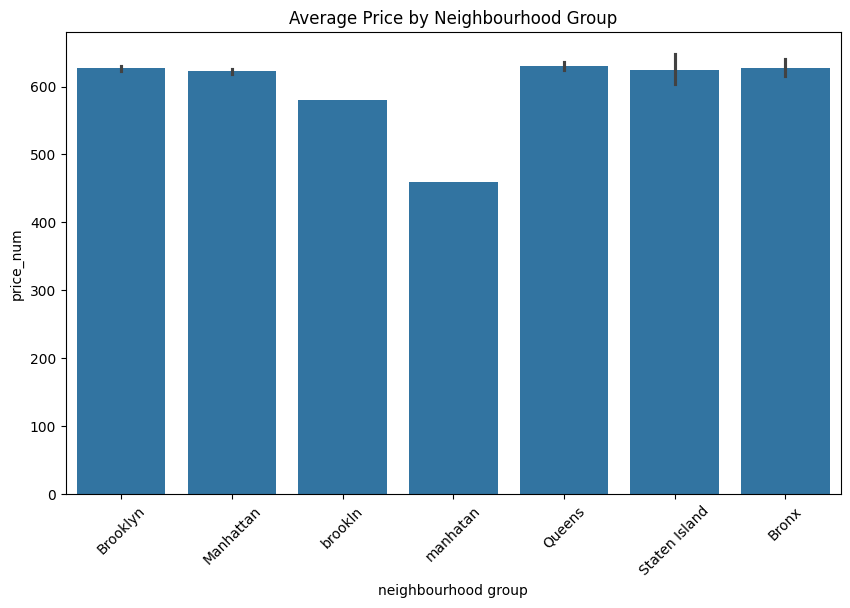

In [14]:
# Average price by neighbourhood group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='neighbourhood group', y='price_num')
plt.title('Average Price by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

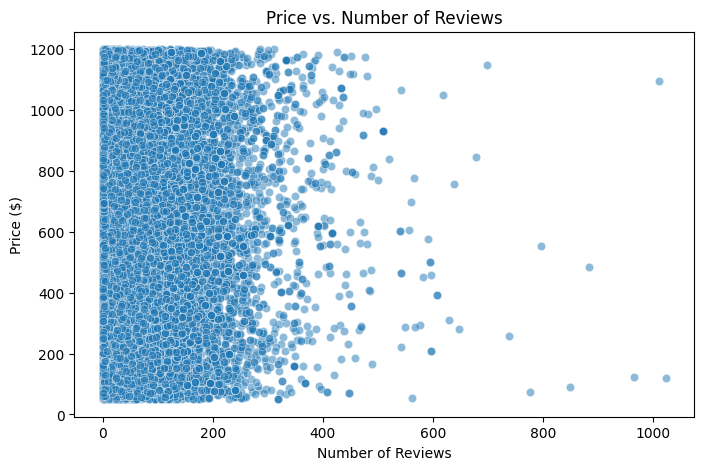

In [15]:
#Scatter Plot (Price vs. Number of Reviews) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='number of reviews', y='price_num', alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

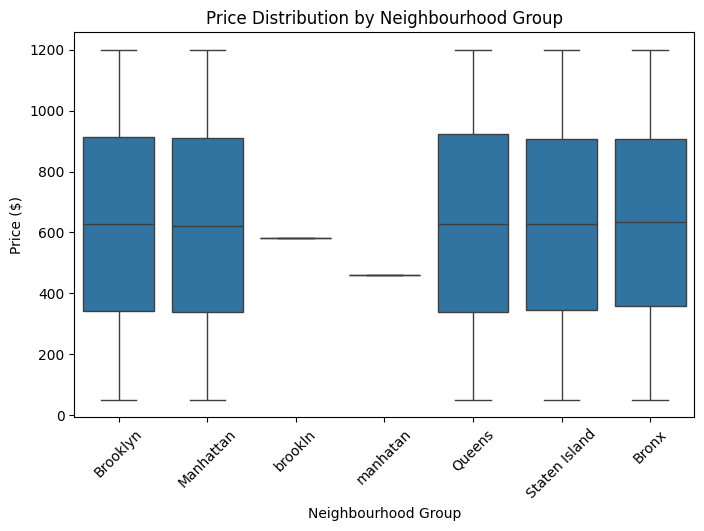

In [16]:
#Box Plot (Price by Neighbourhood Group) ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='neighbourhood group', y='price_num')
plt.title('Price Distribution by Neighbourhood Group')
plt.xticks(rotation=45)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')
plt.show()

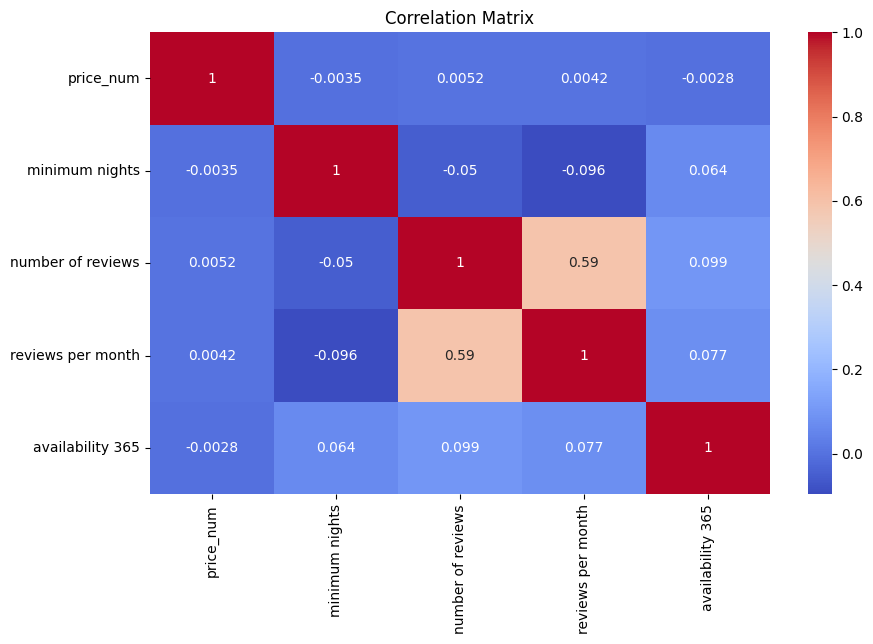

In [17]:
# Correlation matrix
numerical_cols = ['price_num', 'minimum nights', 'number of reviews', 'reviews per month', 'availability 365']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Clean price
df['price_num'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df = df.dropna(subset=['price_num'])

In [19]:
# Drop irrelevant columns
df = df.drop(['id', 'NAME', 'host id', 'host name', 'lat', 'long', 'country', 'country code', 'last review'], axis=1)

In [20]:
# Handle outliers
df['price_num'] = df['price_num'].clip(upper=df['price_num'].quantile(0.99))
df['minimum nights'] = df['minimum nights'].clip(upper=df['minimum nights'].quantile(0.99))
df['availability 365'] = df['availability 365'].clip(upper=df['availability 365'].quantile(0.99))

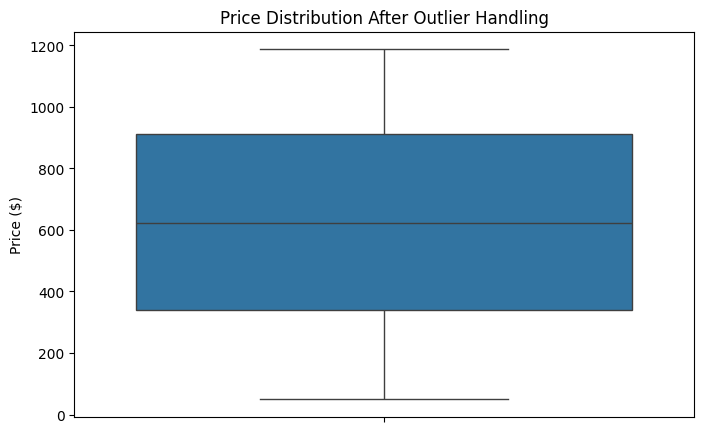

In [21]:
# --- Figure 2 (continued): Price After Outlier Handling ---
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['price_num'])
plt.title('Price Distribution After Outlier Handling')
plt.ylabel('Price ($)')
plt.savefig('price_after_outliers.png')
plt.show()

In [22]:
# Impute missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

In [23]:
# Define numerical and categorical columns
numerical_cols = ['minimum nights', 'number of reviews', 'reviews per month', 'availability 365', 'Construction year']
categorical_cols = ['room type', 'neighbourhood group', 'cancellation_policy']

In [24]:
# Define X (features) and y (target)
X = df[numerical_cols + categorical_cols]  # Select relevant columns
y = df['price_num']  # Target variable

In [25]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_cols)
    ])

In [26]:
# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [28]:
print("Preprocessing completed. X_train shape:", X_train.shape, "X_test shape:", X_test.shape)

Preprocessing completed. X_train shape: (81881, 18) X_test shape: (20471, 18)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
# Train models
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
# Predict
rf_pred = rf_model.predict(X_test)

In [32]:
# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest - MAE:", rf_mae)
print("Random Forest - R²:", rf_r2)

Random Forest - MAE: 231.0854221871462
Random Forest - R²: 0.2447478223294779


In [33]:
# Initialize models
lr_model = LinearRegression()

# Train models
lr_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict
lr_pred = lr_model.predict(X_test)

In [35]:
# Evaluate
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print("Linear Regression - MAE:",lr_mae)
print("Linear Regression - R²:", lr_r2)

Linear Regression - MAE: 286.9376540337046
Linear Regression - R²: -0.00027846140636600403


In [36]:
# Calculate and print accuracy percentage
rf_accuracy_pct = rf_r2 * 100
lr_accuracy_pct = lr_r2 * 100
print("Random Forest - Accuracy Percentage: {:.2f}%".format(rf_accuracy_pct))
print("Linear Regression - Accuracy Percentage: {:.2f}%".format(lr_accuracy_pct))

Random Forest - Accuracy Percentage: 24.47%
Linear Regression - Accuracy Percentage: -0.03%


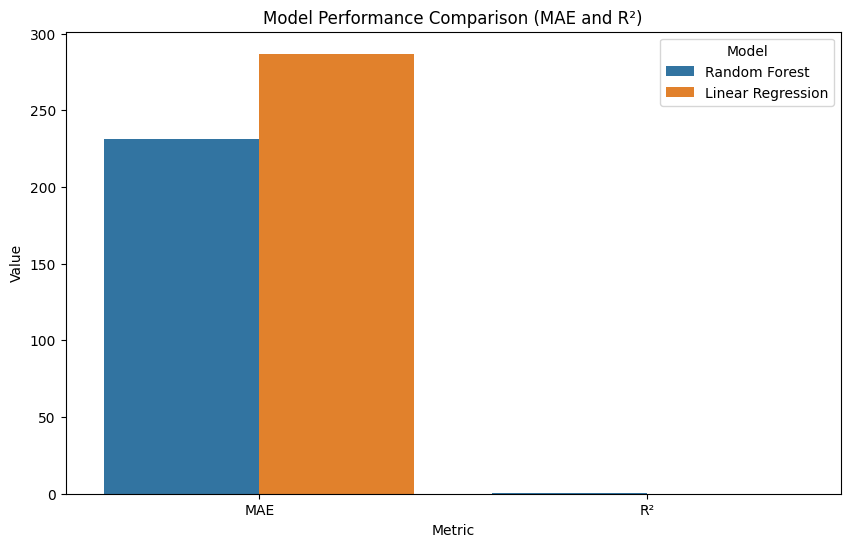

In [37]:
# ---  Bar Plot for Model Performance (MAE and R²) ---
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'Linear Regression', 'Linear Regression'],
    'Metric': ['MAE', 'R²', 'MAE', 'R²'],
    'Value': [rf_mae, rf_r2, lr_mae, lr_r2]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='Metric', y='Value', hue='Model')
plt.title('Model Performance Comparison (MAE and R²)')
plt.ylabel('Value')
plt.legend(title='Model')
plt.show()

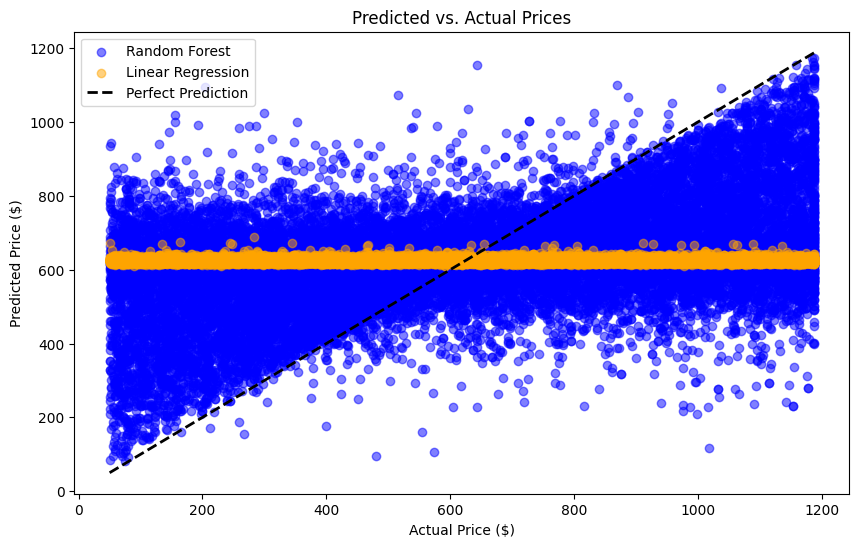

In [38]:
# --- Scatter Plot for Predicted vs. Actual Prices ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, label='Random Forest', alpha=0.5, color='blue')
plt.scatter(y_test, lr_pred, label='Linear Regression', alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Predicted vs. Actual Prices')
plt.legend()
plt.show()

In [39]:
# Feature importance
feature_names = (numerical_cols + 
                 preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_cols).tolist())
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)


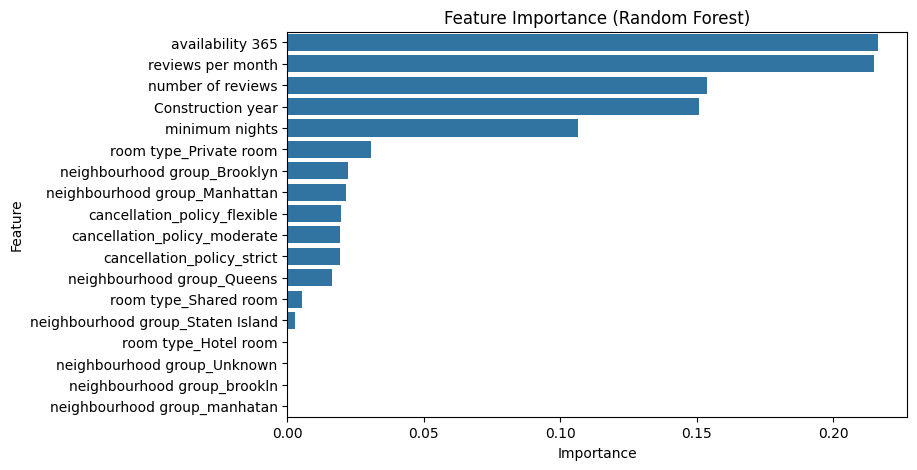

In [40]:
# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()